In [6]:
import pandas as pd
import numpy as np
import requests

sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

header = {
    "User-Agent": "Mozilla/5.0",
    "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(sp500_url, headers=header)

tables = pd.read_html(r.text)

data_table = tables[1]

data_table.head()


/tmp/ipython-input-1185587511.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(r.text)


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [7]:
data_table

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [8]:
data_table['Symbol']

,Symbol
0,MMM
1,AOS
2,ABT
3,ABBV
4,ACN
...,...
498,XYL
499,YUM
500,ZBRA
501,ZBH


In [9]:


import yfinance as yf
!pip install yahoofinancials
from yahoofinancials import YahooFinancials
from datetime import datetime

start = '2022-01-01'
end = '2025-01-01'

Data_stock_price = yf.download(data_table['Symbol'].values.tolist(), start= start , end = end)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38618 sha256=8583b9db47e12714f9c5d163ed98668ff48759a5e430ffcf506a808c1149d9da
  Stored in directory: /root/.cache/pip/wheels/b0/e1/ca/e683b02e57db550881c8ebb89ba3eccb7a5c0ebfad7f03acea
Successfully built yahoofinancials


/tmp/ipython-input-3118311220.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Data_stock_price = yf.download(data_table['Symbol'].values.tolist(), start= start , end = end)
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01)')
ERROR:yfinance:['SOLS', 'Q']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


In [10]:
Data_stock_price

Price      Adj Close                      Close                          \
Ticker          BF.B BRK.B   Q SOLS           A        AAPL        ABBV   
Date                                                                      
2022-01-03       NaN   NaN NaN  NaN  152.320053  178.270309  116.779282   
2022-01-04       NaN   NaN NaN  NaN  147.170685  176.007797  116.555084   
2022-01-05       NaN   NaN NaN  NaN  144.649567  171.325974  117.167366   
2022-01-06       NaN   NaN NaN  NaN  145.155716  168.466003  116.615440   
2022-01-07       NaN   NaN NaN  NaN  141.291245  168.632507  116.313644   
...              ...   ...  ..  ...         ...         ...         ...   
2024-12-24       NaN   NaN NaN  NaN  135.004913  257.037476  173.918808   
2024-12-26       NaN   NaN NaN  NaN  134.737106  257.853760  173.145844   
2024-12-27       NaN   NaN NaN  NaN  134.449432  254.439209  171.996017   
2024-12-30       NaN   NaN NaN  NaN  133.338440  251.064484  170.247192   
2024-12-31       NaN   NaN NaN  NaN  133.505386  249.292511  171.696503   

Price                                          ...   Volume                    \
Ticker            ABNB         ABT       ACGL  ...       WY     WYNN      XEL   
Date                                           ...                              
2022-01-03  172.679993  128.996140  42.362530  ...  3831100  2437800  3501100   
2022-01-04  170.800003  125.962372  42.914051  ...  3089700  2292300  4197000   
2022-01-05  162.250000  125.396423  42.410072  ...  3737600  3439900  4166000   
2022-01-06  159.750000  125.377876  42.657307  ...  3315200  2583200  2296000   
2022-01-07  166.050003  125.767540  42.856995  ...  3309900  1720400  2673100   
...                ...         ...        ...  ...      ...      ...      ...   
2024-12-24  134.990005  112.625931  92.669998  ...  1780100   692800   943900   
2024-12-26  135.320007  113.126442  92.930000  ...  1736500  1218900  1394900   
2024-12-27  133.384995  112.851654  92.339996  ...  2320500  1086700  2015000   
2024-12-30  131.809998  110.702385  91.889999  ...  2914700  2180100  2642900   
2024-12-31  131.410004  111.006607  92.349998  ...  3125200  1612600  2143800   

Price                                                                       
Ticker           XOM      XYL       XYZ      YUM      ZBH    ZBRA      ZTS  
Date                                                                        
2022-01-03  24282400   759100   7315700  1251400  1184809  272600  2772700  
2022-01-04  38584000   925400  14768500   935900  1400800  346000  4664000  
2022-01-05  34033300  1090200  17546200   977900  1895715  403700  4749400  
2022-01-06  30668500   703400  16244200   862400  1088813  338300  3103400  
2022-01-07  23985400   765000   9426000   833700  1690230  432800  2206500  
...              ...      ...       ...      ...      ...     ...      ...  
2024-12-24   7807000   379300   2197700   533000   458600   88700  1023600  
2024-12-26   9652400   575700   2991100  1040900  1277300  140100  2167200  
2024-12-27  11943900   552400   4140800  1146300   743400  287200  1800100  
2024-12-30  11080800   586800   5383800  1144600  1532000  211300  1531400  
2024-12-31  12387800   641600   4989400  1217100   683300  327900  1327400  

[753 rows x 2519 columns]

In [11]:
close_prices = Data_stock_price['Close']
clean_close = close_prices.dropna(how='all')

clean_close.head()


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,152.320053,178.270309,116.779282,172.679993,128.996140,42.362530,383.711884,564.369995,165.624512,60.489799,...,34.600178,85.311447,60.062122,55.125240,111.648552,164.029999,127.066345,121.447723,583.900024,224.977783
2022-01-04,147.170685,176.007797,116.555084,170.800003,125.962372,42.914051,380.969879,554.000000,164.128662,61.612453,...,35.043659,85.039299,60.442287,57.198723,112.832947,156.330002,127.745720,122.679794,587.599976,216.412430
2022-01-05,144.649567,171.325974,117.167366,162.250000,125.396423,42.410072,374.260712,514.429993,161.594925,61.131306,...,34.173756,81.890045,61.034592,57.910122,111.295128,143.490005,126.126320,122.275375,558.179993,208.183517
2022-01-06,145.155716,168.466003,116.615440,159.750000,125.377876,42.657307,356.187500,514.119995,162.109161,61.674824,...,34.446663,82.269119,60.557201,59.272205,111.142311,144.660004,127.429291,121.259628,555.159973,209.010284
2022-01-07,141.291245,168.632507,116.313644,166.050003,125.767540,42.856995,349.355865,510.700012,157.855179,62.200500,...,34.404022,82.181656,61.087635,59.758034,110.254013,141.539993,125.968094,120.526016,530.859985,202.925140


In [12]:
import math
daily_returns = Data_stock_price['Close'].pct_change()
annual_volatility = daily_returns.std()*math.sqrt(252)

/tmp/ipython-input-203842932.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = Data_stock_price['Close'].pct_change()


In [13]:
annual_volatility

,0
Ticker,
A,0.296259
AAPL,0.270935
ABBV,0.219958
ABNB,0.467875
ABT,0.217839
...,...
XYZ,0.653825
YUM,0.191335
ZBH,0.245157


In [14]:
import math
daily_returns = Data_stock_price['Close'].pct_change()
annual_volatility = daily_returns.std()*math.sqrt(252)

/tmp/ipython-input-203842932.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = Data_stock_price['Close'].pct_change()


In [15]:

import yfinance as yf
import pandas as pd


def betas(markets, stocks, start_date, end_date):

  market = yf.download(markets, start_date, end_date)
  market['stock_name'] = markets

  market['daily_return'] = market['Close'].pct_change(1)

  market_std = market['daily_return'].std()
  market.dropna(inplace=True)
  market = market[['Close', 'stock_name', 'daily_return']]

  frames = []
  stds = []
  for i in stocks:
    data = yf.download(i, start_date, end_date)
    data['stock_name'] = i
    data['daily_return'] = data['Close'].pct_change(1)
    data.dropna(inplace=True)
    data = data[[ 'Close', 'stock_name', 'daily_return']]
    data_std = data['daily_return'].std()
    frames.append(data)
    stds.append(data_std)

  stock_correlation = []
  for i in frames:
    correlation = i['daily_return'].corr(market['daily_return'])
    stock_correlation.append(correlation)

  betas = []
  for b,i in zip(stock_correlation, stds):
    beta_calc = b * (i/market_std)
    betas.append(beta_calc)

  dictionary = {stocks[e]: betas[e] for e in range(len(stocks))}
  dataframe = pd.DataFrame([dictionary]).T
  dataframe.reset_index(inplace=True)
  dataframe.rename(
    columns={"index": "Stock_Name", 0: "Beta"},
    inplace=True,)
  return dataframe

In [16]:
betas = betas('^GSPC', data_table['Symbol'], '2022-01-01', '2025-01-01')

/tmp/ipython-input-2613586705.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market = yf.download(markets, start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2613586705.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2613586705.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2613586705.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2613586705.py:19: FutureWarning: YF.download() has cha

In [17]:
betas

,Stock_Name,Beta
0,MMM,0.783736
1,AOS,0.924451
2,ABT,0.672317
3,ABBV,0.299098
4,ACN,1.094207
...,...,...
498,XYL,1.067701
499,YUM,0.633410
500,ZBRA,1.500189
501,ZBH,0.736503


In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

try:
    clean_betas_drop
except:
    try:
        clean_betas
    except:
        betas = betas.dropna()
        clean_betas = betas.copy()
    clean_betas_drop = clean_betas.copy()

x_drop = clean_betas_drop[['Beta']].values


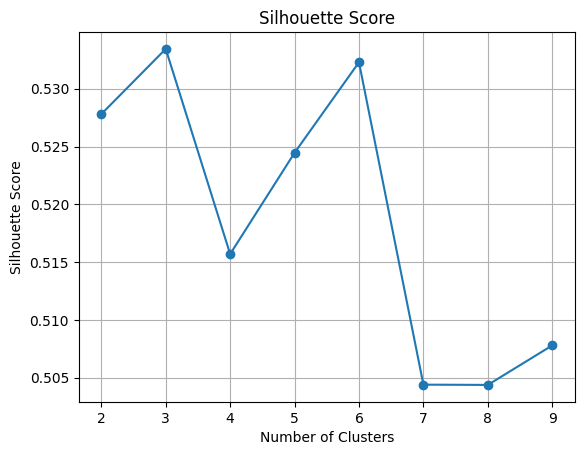

In [19]:
X_drop = clean_betas_drop[['Beta']].values

scores_drop = []
for n_clusters in range(2,10):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X_drop)
    scores_drop.append(silhouette_score(X_drop, labels))

plt.plot(range(2,10), scores_drop, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()



In [20]:
X = clean_betas[['Beta']].values


In [21]:
best_k = 9

final_model = AgglomerativeClustering(n_clusters=best_k)
final_labels = final_model.fit_predict(X)

clean_betas['Agg_Cluster'] = final_labels

clean_betas.head()


,Stock_Name,Beta,Agg_Cluster
0,MMM,0.783736,0
1,AOS,0.924451,1
2,ABT,0.672317,0
3,ABBV,0.299098,2
4,ACN,1.094207,1


In [22]:
cluster_summary = clean_betas.groupby('Agg_Cluster')['Beta'].describe()
cluster_summary



,count,mean,std,min,25%,50%,75%,max
Agg_Cluster,,,,,,,,
0,108.0,0.761166,0.070871,0.630421,0.701923,0.766260,0.823889,0.877684
1,123.0,0.989601,0.065639,0.883542,0.935264,0.981124,1.041217,1.111455
2,71.0,0.366247,0.087938,0.108994,0.305976,0.383688,0.438746,0.470864
3,16.0,2.026546,0.148370,1.845584,1.936503,1.975692,2.147995,2.268516
4,39.0,1.433269,0.066400,1.327748,1.370552,1.427285,1.497213,1.534637
5,65.0,1.195198,0.052871,1.120439,1.147513,1.192552,1.237987,1.302100
6,55.0,0.551116,0.037788,0.481626,0.516281,0.557121,0.584254,0.613733
7,2.0,2.752872,0.294280,2.544784,2.648828,2.752872,2.856915,2.960959
8,20.0,1.653633,0.071667,1.558665,1.589450,1.652229,1.709499,1.792212


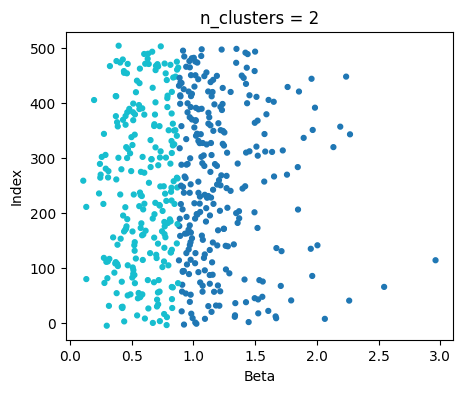

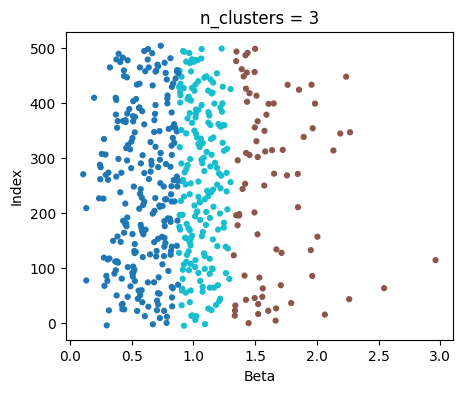

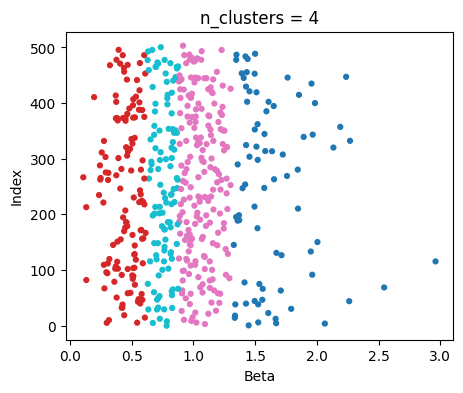

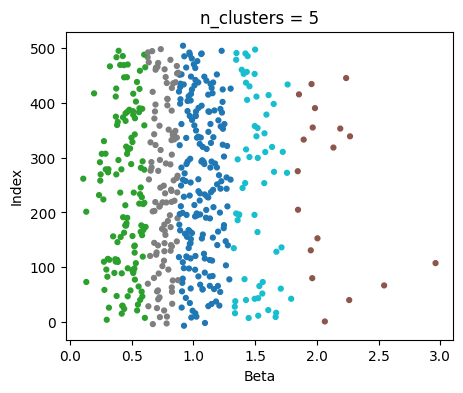

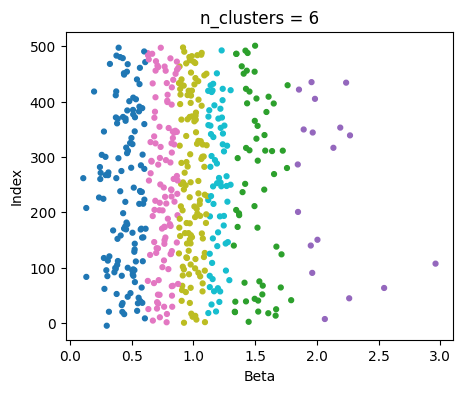

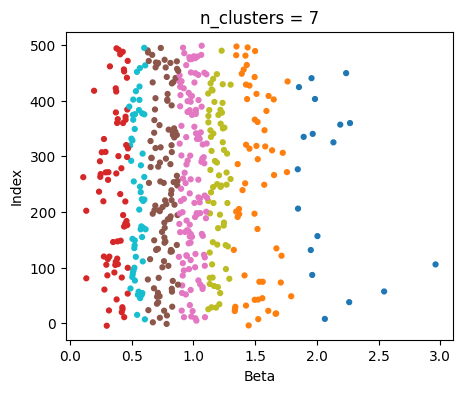

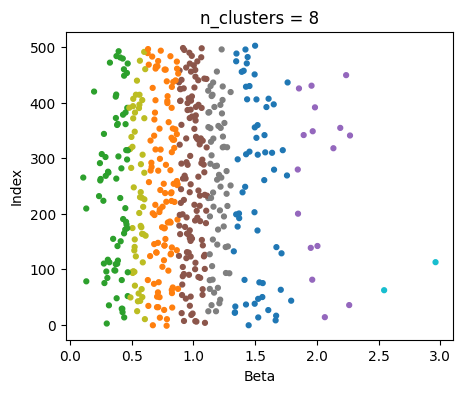

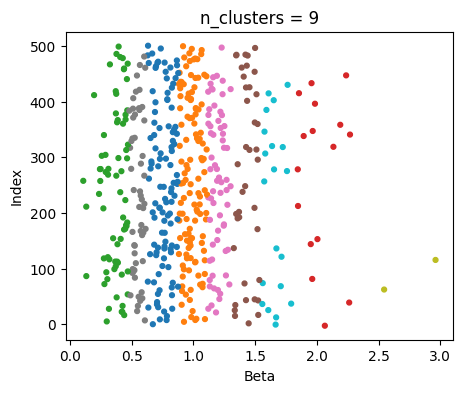

In [23]:
X = clean_betas[['Beta']].values.flatten()

for n_clusters in range(2, 10):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X.reshape(-1,1))

    y_index = np.arange(len(X))
    jitter = np.random.normal(0, 5, size=len(X))  # small vertical jitter

    plt.figure(figsize=(5,4))
    plt.scatter(
        X,
        y_index + jitter,
        c=labels,
        cmap='tab10',
        s=12
    )

    plt.xlabel("Beta")
    plt.ylabel("Index")
    plt.title(f"n_clusters = {n_clusters}")
    plt.show()


In [24]:
whos DataFrame


Variable           Type         Data/Info
-----------------------------------------
Data_stock_price   DataFrame    Price      Adj Close     <...>[753 rows x 2519 columns]
betas              DataFrame        Stock_Name      Beta\<...>n\n[499 rows x 2 columns]
clean_betas        DataFrame        Stock_Name      Beta <...>n\n[499 rows x 3 columns]
clean_betas_drop   DataFrame        Stock_Name      Beta\<...>n\n[499 rows x 2 columns]
clean_close        DataFrame    Ticker               A   <...>n[753 rows x 503 columns]
close_prices       DataFrame    Ticker               A   <...>n[753 rows x 503 columns]
cluster_summary    DataFrame                 count      m<...>     1.709499  1.792212  
daily_returns      DataFrame    Ticker             A     <...>n[753 rows x 503 columns]
data_table         DataFrame        Symbol             Se<...>n\n[503 rows x 8 columns]


In [25]:
clean_betas.head()


,Stock_Name,Beta,Agg_Cluster
0,MMM,0.783736,0
1,AOS,0.924451,1
2,ABT,0.672317,0
3,ABBV,0.299098,2
4,ACN,1.094207,1


In [26]:
daily_returns.head()


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,-0.033806,-0.012691,-0.001920,-0.010887,-0.023518,0.013019,-0.007146,-0.018374,-0.009032,0.018559,...,0.012817,-0.003190,0.006330,0.037614,0.010608,-0.046943,0.005347,0.010145,0.006337,-0.038072
2022-01-05,-0.017131,-0.026600,0.005253,-0.050059,-0.004493,-0.011744,-0.017611,-0.071426,-0.015438,-0.007809,...,-0.024823,-0.037033,0.009800,0.012437,-0.013629,-0.082134,-0.012677,-0.003297,-0.050068,-0.038024
2022-01-06,0.003499,-0.016693,-0.004711,-0.015408,-0.000148,0.005830,-0.048290,-0.000603,0.003182,0.008891,...,0.007986,0.004629,-0.007822,0.023521,-0.001373,0.008154,0.010331,-0.008307,-0.005410,0.003971
2022-01-07,-0.026623,0.000988,-0.002588,0.039437,0.003108,0.004681,-0.019180,-0.006652,-0.026241,0.008523,...,-0.001238,-0.001063,0.008759,0.008197,-0.007992,-0.021568,-0.011467,-0.006050,-0.043771,-0.029114


In [27]:
volatility = daily_returns.std()
volatility = volatility.reset_index()
volatility.columns = ['Stock_Name', 'Volatility']

clean_betas_km = clean_betas.merge(volatility, on='Stock_Name', how='inner')
clean_betas_km = clean_betas_km.dropna(subset=['Volatility'])
clean_betas_km.head()


,Stock_Name,Beta,Agg_Cluster,Volatility
0,MMM,0.783736,0,0.018624
1,AOS,0.924451,1,0.017555
2,ABT,0.672317,0,0.013723
3,ABBV,0.299098,2,0.013856
4,ACN,1.094207,1,0.017029


In [28]:
from sklearn.preprocessing import StandardScaler

X_km = clean_betas_km[['Beta', 'Volatility']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_km)


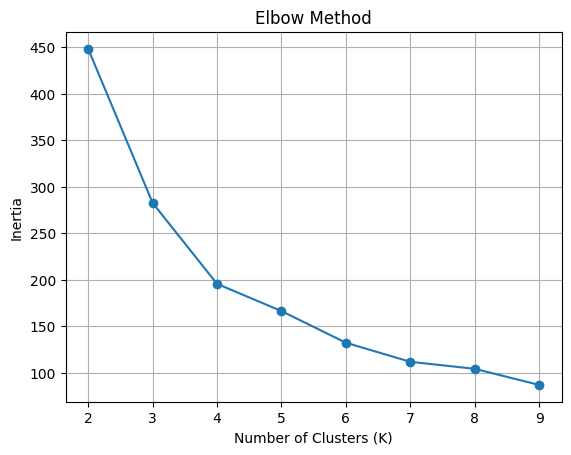

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2,10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()


In [30]:
betas = clean_betas[['Stock_Name', 'Beta']].reset_index(drop=True)


vol_km = annual_volatility.reset_index()
vol_km.columns = ['Stock_Name', 'Volatility']

clean_betas_km = pd.merge(betas, vol_km, on='Stock_Name', how='inner')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_km = scaler.fit_transform(clean_betas_km[['Beta', 'Volatility']])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
final_labels_km = kmeans.fit_predict(X_km)


clean_betas_km['KMeans_Cluster'] = final_labels_km


clean_betas_km.head()



,Stock_Name,Beta,Volatility,KMeans_Cluster
0,MMM,0.783736,0.295654,1
1,AOS,0.924451,0.278673,0
2,ABT,0.672317,0.217839,1
3,ABBV,0.299098,0.219958,1
4,ACN,1.094207,0.270331,0


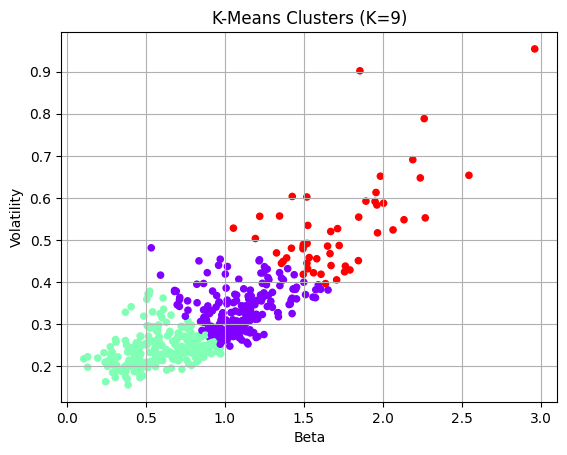

In [31]:
plt.scatter(clean_betas_km['Beta'], clean_betas_km['Volatility'], c=final_labels_km, cmap='rainbow', s=20)
plt.xlabel("Beta")
plt.ylabel("Volatility")
plt.title(f"K-Means Clusters (K={best_k})")
plt.grid(True)
plt.show()


In [49]:
import pandas as pd
import matplotlib.pyplot as plt


close_prices = Data_stock_price['Close']
clean_close = close_prices.dropna(how='all')


daily_returns = clean_close.pct_change().dropna()


avg_daily_returns = daily_returns.mean()
df_returns = avg_daily_returns.reset_index()
df_returns.columns = ['Stock_Name', 'Avg_Daily_Return']

df_betas = clean_betas[['Stock_Name', 'Beta']]

df_vol = annual_volatility.reset_index()
df_vol.columns = ['Stock_Name', 'Annual_Volatility']


df_metrics = df_returns.merge(df_betas, on='Stock_Name', how='inner')
df_metrics = df_metrics.merge(df_vol, on='Stock_Name', how='inner')


df_metrics.head()


/tmp/ipython-input-1171983669.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = clean_close.pct_change().dropna()


,Stock_Name,Avg_Daily_Return,Beta,Annual_Volatility
0,A,NaN,1.024801,0.296259
1,AAPL,NaN,1.210688,0.270935
2,ABBV,NaN,0.299098,0.219958
3,ABNB,NaN,1.666256,0.467875
4,ABT,NaN,0.672317,0.217839


In [33]:

close_prices = Data_stock_price['Close']
clean_close = close_prices.dropna(how='all')

daily_returns = clean_close.pct_change().dropna()


/tmp/ipython-input-1243017838.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = clean_close.pct_change().dropna()


In [34]:

avg_daily_returns = daily_returns.mean()

df_returns = avg_daily_returns.reset_index()
df_returns.columns = ['Stock_Name', 'Avg_Daily_Return']


In [35]:
final_results = pd.merge(clean_betas_km, df_returns, on='Stock_Name', how='inner')
final_results.head()


,Stock_Name,Beta,Volatility,KMeans_Cluster,Avg_Daily_Return
0,MMM,0.783736,0.295654,1,NaN
1,AOS,0.924451,0.278673,0,NaN
2,ABT,0.672317,0.217839,1,NaN
3,ABBV,0.299098,0.219958,1,NaN
4,ACN,1.094207,0.270331,0,NaN


In [36]:
cluster_summary = final_results.groupby('KMeans_Cluster')[['Avg_Daily_Return','Beta','Volatility']].mean()
cluster_summary


,Avg_Daily_Return,Beta,Volatility
KMeans_Cluster,,,
0,NaN,1.089732,0.331749
1,NaN,0.601077,0.241465
2,NaN,1.720762,0.530261


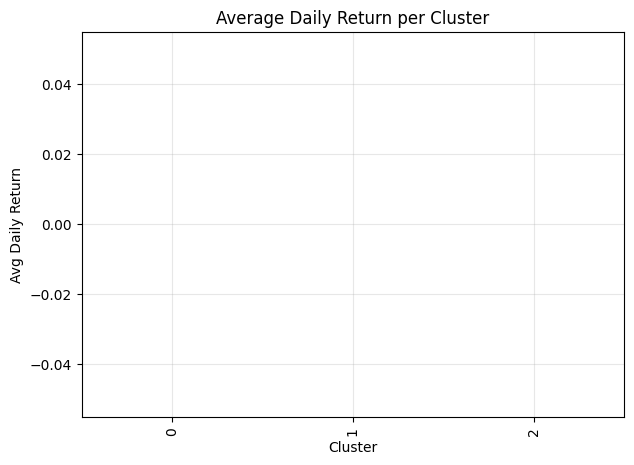

In [37]:
cluster_summary['Avg_Daily_Return'].plot(kind='bar', figsize=(7,5), title='Average Daily Return per Cluster')
plt.xlabel("Cluster")
plt.ylabel("Avg Daily Return")
plt.grid(True, alpha=0.3)
plt.show()


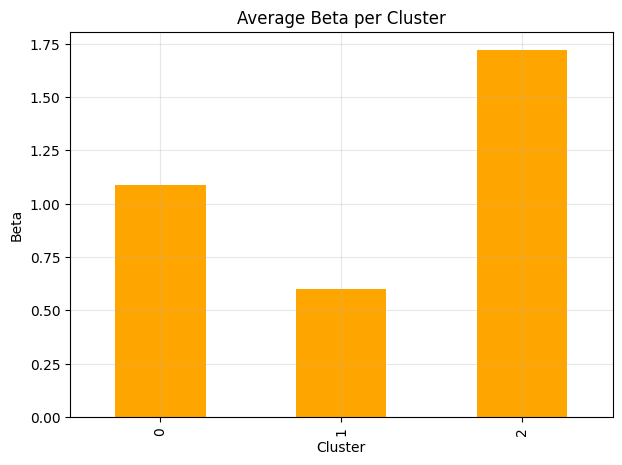

In [38]:
cluster_summary['Beta'].plot(kind='bar', figsize=(7,5), title='Average Beta per Cluster', color='orange')
plt.xlabel("Cluster")
plt.ylabel("Beta")
plt.grid(True, alpha=0.3)
plt.show()


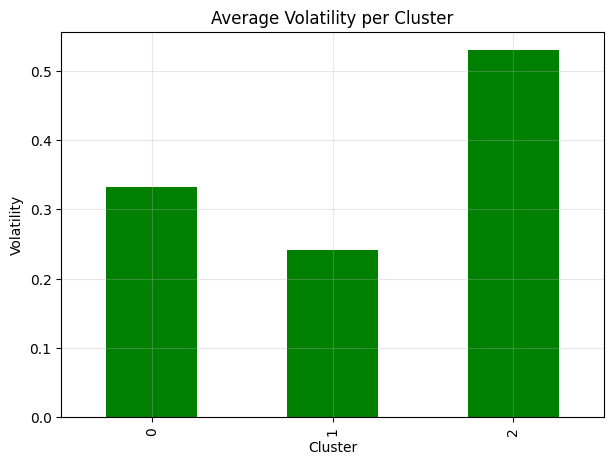

In [39]:
cluster_summary['Volatility'].plot(kind='bar', figsize=(7,5), title='Average Volatility per Cluster', color='green')
plt.xlabel("Cluster")
plt.ylabel("Volatility")
plt.grid(True, alpha=0.3)
plt.show()


In [43]:
import seaborn as sns


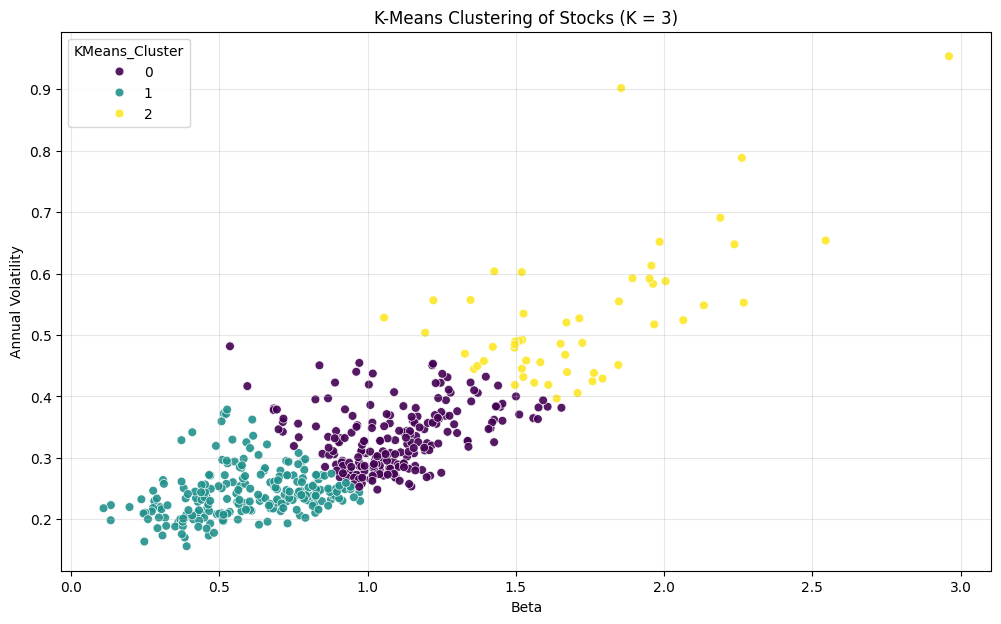

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

sns.scatterplot(
    x=clean_betas_km['Beta'],
    y=clean_betas_km['Volatility'],
    hue=clean_betas_km['KMeans_Cluster'],
    palette='viridis',
    s=40,
    alpha=0.9
)

plt.title("K-Means Clustering of Stocks (K = 3)")
plt.xlabel("Beta")
plt.ylabel("Annual Volatility")
plt.grid(alpha=0.3)
plt.legend(title="KMeans_Cluster")
plt.show()


In [45]:
betas = clean_betas[['Stock_Name','Beta']].reset_index(drop=True)

vol_km = annual_volatility.reset_index()
vol_km.columns = ['Stock_Name','Annual_Volatility']

df_kmeans = pd.merge(betas, vol_km, on='Stock_Name', how='inner')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kmeans[['Beta','Annual_Volatility']])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

df_kmeans['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

df_kmeans.head()


,Stock_Name,Beta,Annual_Volatility,KMeans_Cluster
0,MMM,0.783736,0.295654,1
1,AOS,0.924451,0.278673,1
2,ABT,0.672317,0.217839,2
3,ABBV,0.299098,0.219958,2
4,ACN,1.094207,0.270331,1


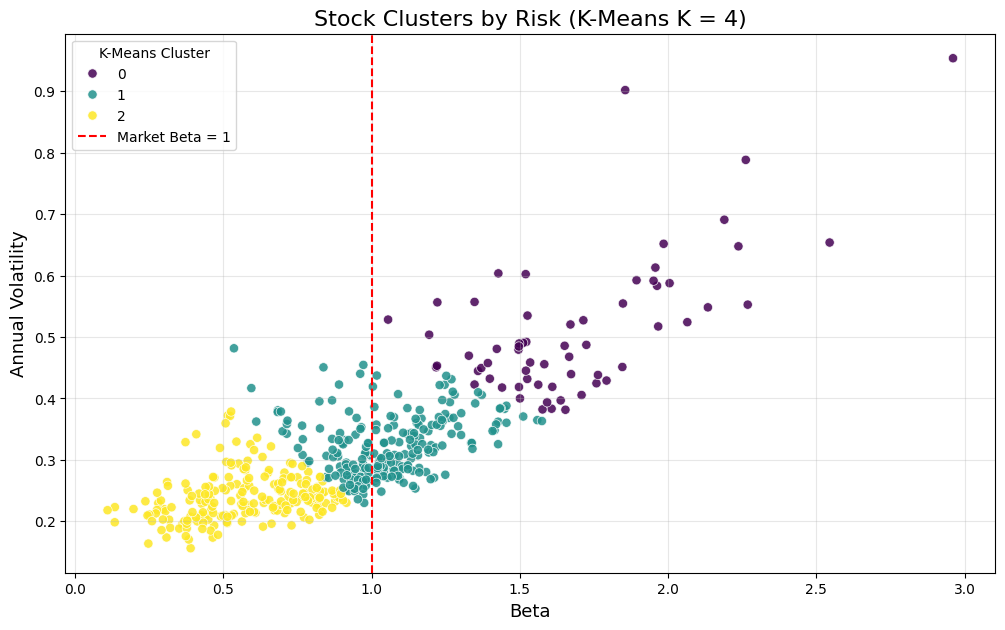

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=df_kmeans,
    x='Beta',
    y='Annual_Volatility',
    hue='KMeans_Cluster',
    palette='viridis',
    s=45,
    alpha=0.85
)
plt.axvline(x=1.0, color='red', linestyle='--', linewidth=1.5, label='Market Beta = 1')

plt.title("Stock Clusters by Risk (K-Means K = 4)", fontsize=16)
plt.xlabel("Beta", fontsize=13)
plt.ylabel("Annual Volatility", fontsize=13)

plt.legend(title="K-Means Cluster")
plt.grid(alpha=0.3)

plt.show()

                    Beta  Volatility
KMeans_Cluster                      
0               1.089732    0.331749
1               0.601077    0.241465
2               1.720762    0.530261


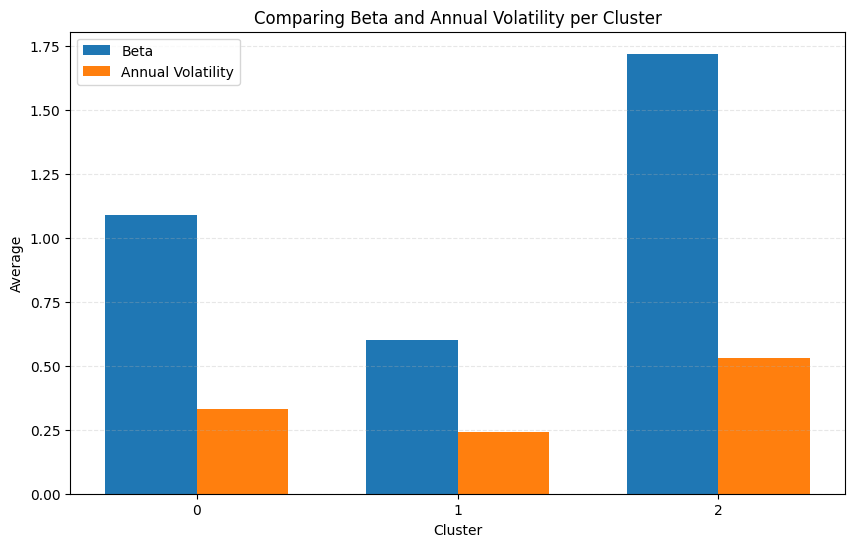

In [47]:
import matplotlib.pyplot as plt
import numpy as np


cluster_stats = clean_betas_km.groupby("KMeans_Cluster")[["Beta", "Volatility"]].mean()

print(cluster_stats)

clusters = cluster_stats.index
beta_means = cluster_stats["Beta"].values
vol_means = cluster_stats["Volatility"].values

x = np.arange(len(clusters))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, beta_means, width, label='Beta')
plt.bar(x + width/2, vol_means, width, label='Annual Volatility')

plt.xlabel("Cluster")
plt.ylabel("Average")
plt.title("Comparing Beta and Annual Volatility per Cluster")
plt.xticks(x, clusters)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()
